## Experiment 8 : HE- MU transmit packet power analysis for different MCS combinations and RU size



### *1. Learning objectives*

• To create a multiuser (MU) high efficiency (HE) format configuration object for IEEE 802.11ax MU waveform with 
  nine equally sized Resource Unit of size 26 tones (RU allocation index = 0).

• To configure a TGax channel of 20 MHz bandwidth using wlanTGaxChannel system object.

• To vary Modulation and coding scheme (MCS) from 0-9 and record the transmit power for different MCS.

• Transmit power computation in time-domain and in frequency domain using a system object SpectrumAnalyzer

• To vary allocation index and analyze the transmit power for different MCS, and RU sizes.

### *2. Introduction*

#### • Allocation index and RU size

1) cfgHEMU= wlanHEMUConfig(0) 
    - Allocation info: NumUsers: 9 NumRUs: 9 
    - RUIndices: [1 2 3 4 5 6 7 8 9]
    - RUSizes: [26 26 26 26 26 26 26 26 26] 
    - NumUsersPerRU: [1 1 1 1 1 1 1 1 1] 
    - RUNumbers: [1 2 3 4 5 6 7 8 9]
2) cfgHEMU= wlanHEMUConfig(15) 
    - Allocation info: NumUsers: 5 NumRUs: 5 
    - RUIndices: [1 2 5 3 4] 
    - RUSizes: [52 52 26 52 52] 
    - NumUsersPerRU: [1 1 1 1 1] 
    - RUNumbers: [1 2 3 4 5]

3) cfgHEMU = wlanHEMUConfig(96) 
    - Allocation info: NumUsers: 2 NumRUs: 2 
    - RUIndices: [1 2] 
    - RUSizes: [106 106] 
    - NumUsersPerRU: [1 1] 
    - RUNumbers: [1 2] 

<img src="r2.png" style="width:600px;height:400px" title="RU details"/>

<img src="r3.png" style="width:600px;height:400px" title="RU details"/>

### *3. Results*

<img src="r8.png" style="width:600px;height:400px" title="RU details"/>

<img src="r9.png" style="width:600px;height:400px" title="Baseband IEEE waveform"/>

<img src="r10.png" style="width:600px;height:400px" title="Baseband IEEE Waveform"/>

<img src="r11.png" style="width:600px;height:400px" title="Baseband IEEE waveform"/>

### *4. Code*

<h3>Initialization and Configuration</h3>

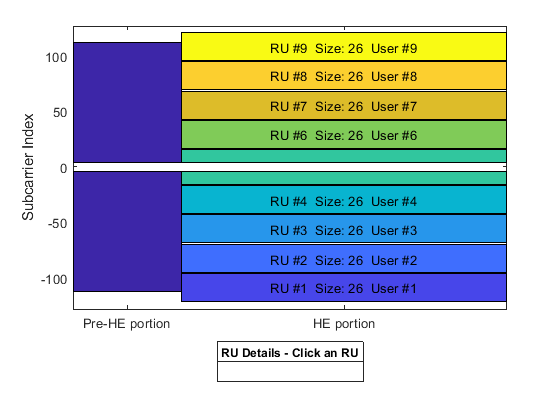

allocInfo = struct with fields:
                    NumUsers: 9
                      NumRUs: 9
                   RUIndices: [1 2 3 4 5 6 7 8 9]
                     RUSizes: [26 26 26 26 26 26 26 26 26]
               NumUsersPerRU: [1 1 1 1 1 1 1 1 1]
    NumSpaceTimeStreamsPerRU: [1 1 1 1 1 1 1 1 1]
       PowerBoostFactorPerRU: [1 1 1 1 1 1 1 1 1]
                   RUNumbers: [1 2 3 4 5 6 7 8 9]

In [1]:
clc; close all; clear all;
cfgHEMU = wlanHEMUConfig(0); 
cfgHEMU.showAllocation
allocInfo = ruInfo(cfgHEMU)
sr = wlanSampleRate(cfgHEMU);

- *cfgHEMU = wlanHEMUConfig(0)* : Initializes the configuration for the HE-MU transmission with a predefined configuration (index 0). This configures parameters like the number of users, RU allocation, and more
- *cfgHEMU.showAllocation*: Displays the allocation of resources in the MU transmission, such as the number of users and RUs.
- *allocInfo = ruInfo(cfgHEMU)*: Retrieves resource unit allocation information such as the number of users and the size of the RUs.
- *sr = wlanSampleRate(cfgHEMU)*: Retrieves the sample rate for the waveform generation

<h3>User Configuration</h3>

In [2]:
cfgHEMU.User{1}.APEPLength = 500;
for i = 2:numel(cfgHEMU.User)
    cfgHEMU.User{i}.MCS = 10; 
    cfgHEMU.User{i}.APEPLength = 1;
end

- *cfgHEMU.User{1}.APEPLength = 500*: Sets the A-MPDU (Aggregated MPDU) length for the first user to 500 bytes.
- for i = 2:numel(cfgHEMU.User): Loop through all users except the first one
- *cfgHEMU.User{i}.MCS = 10*: Sets the MCS for each user (starting from the second user) to 10.
- *cfgHEMU.User{i}.APEPLength = 1*: Sets the A-MPDU length for the other users to 1 byte (for simplicity).

<h3>Initialization for data Storage</h3>

In [3]:
power_vector = [];
MCS = [];      
tx_length = [];
avg_power_per_sc1 = [];
Avg_power_26tone_RU1 = [];
Avg_power_52tone_RU1 = [];

Initializes empty arrays to store results such as power, MCS, transmission length, average power per subcarrier, and average power per RU for different tones.

<h3>Transmission and Power Analysis</h3>

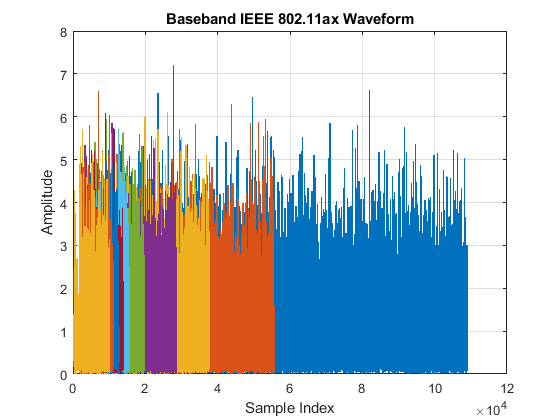

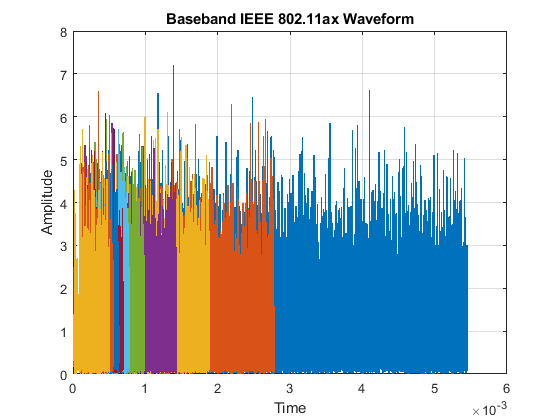

In [4]:
numPackets = 10;
for numPkt = 1:numPackets
    cfgHEMU.User{1}.MCS = numPkt-1;
    mcs = cfgHEMU.User{1}.MCS; % to see the effect of MCS on tx power
    MCS = [MCS mcs];
    
    psduLength = getPSDULength(cfgHEMU); % Get PSDU length for the MCS selected
    txPSDU = cell(1, allocInfo.NumUsers); % Generate a packet with random PSDU
    
    for i = 1:allocInfo.NumUsers
        txPSDU{i} = randi([0 1], psduLength(i)*8, 1, 'int8'); % Generate random PSDU
    end
    
    % Create MU packet waveform
    txMUWave = wlanWaveformGenerator(txPSDU{:,1}, cfgHEMU);
    sample_length = length(txMUWave);
    tx_length = [tx_length sample_length];
    
    % Plot waveform in time and frequency domain
    figure(2)
    plot(abs(txMUWave)); grid on; hold on;
    title('Baseband IEEE 802.11ax Waveform');
    xlabel('Sample Index');
    ylabel('Amplitude');

    figure(3)
    time = (1:length(txMUWave))/sr;
    plot(time, abs(txMUWave)); grid on; hold on;
    title('Baseband IEEE 802.11ax Waveform');
    xlabel('Time');
    ylabel('Amplitude');
    
    % Calculate transmission power
    power1 = (sum(abs(txMUWave).^2)) / sample_length; % Power of the transmission
    power2 = var(txMUWave); % Alternative method to calculate power (variance)
    Tx_power = mean(txMUWave .* conj(txMUWave)); % Mean power
    
    power_vector = [power_vector power1]; % Store power results
    Avg_power_of_tx_waveform = power_vector'; % For display
    
    % Avg. power per subcarrier
    avg_power_per_sc = power1 / 256;
    avg_power_per_sc1 = [avg_power_per_sc1 avg_power_per_sc];
    
    % Avg. power per RU of 26 tones
    Avg_power_26tone_RU = avg_power_per_sc * 26;
    Avg_power_26tone_RU1 = [Avg_power_26tone_RU1 Avg_power_26tone_RU];
    
    % Avg. power per RU of 52 tones
    Avg_power_52tone_RU = avg_power_per_sc * 52;
    Avg_power_52tone_RU1 = [Avg_power_52tone_RU1 Avg_power_52tone_RU];
    
    % Power Spectral Density (PSD) estimate
    [Pxx, F] = periodogram(txMUWave, 'Centered'); % Periodogram to estimate PSD
    Avg_power_periodogram = bandpower(Pxx, F, 'psd'); % Compute average power of the PSD
end


1) **Loop for numPkt from 1 to numPackets**
   - Each iteration modifies the MCS for the first user (cfgHEMU.User{1}.MCS = numPkt - 1) and generates the corresponding packet size (PSDU) based on the MCS
   - *getPSDULength(cfgHEMU)*: Retrieves the PSDU length based on the current configuration
   - *txPSDU{i} = randi([0 1], psduLength(i)*8, 1, 'int8')*: Generates random PSDU for each user in the allocation
   - *txMUWave = wlanWaveformGenerator(txPSDU{:,1}, cfgHEMU)*: Generates the MU transmission waveform from the generated PSDUs
   - *plot(abs(txMUWave)) and plot(time, abs(txMUWave))*: Plots the waveform both in the sample index and time domains
2) **Transmission Power Calculation**
   - *power1*: Total transmission power of the MU waveform
   - *Tx_power*: Alternative power calculation using the mean of the waveform’s conjugate product
3) **Power per Subcarrier and RU**
   - *avg_power_per_sc*: Average power per subcarrier
   - *Avg_power_26tone_RU and Avg_power_52tone_RU*: Average power per RU for 26 and 52 tones respectively

<h3>Final Output and Spectrum Analysis</h3>

In [5]:
avg_power_per_sc1 = avg_power_per_sc1';
Avg_power_26tone_RU1 = Avg_power_26tone_RU1';
Avg_power_52tone_RU1 = Avg_power_52tone_RU1';

[MCS' Avg_power_of_tx_waveform Avg_power_26tone_RU1 Avg_power_52tone_RU1]

ans = 10×4 double
         0    1.0069    0.1023    0.2045
    1.0000    0.9890    0.1004    0.2009
    2.0000    0.9911    0.1007    0.2013
    3.0000    0.9928    0.1008    0.2017
    4.0000    1.0273    0.1043    0.2087
    5.0000    0.9736    0.0989    0.1978
    6.0000    1.0011    0.1017    0.2033
    7.0000    0.9948    0.1010    0.2021
    8.0000    1.0030    0.1019    0.2037
    9.0000    1.0218    0.1038    0.2075

Converts the avg_power_per_sc1, Avg_power_26tone_RU1, and Avg_power_52tone_RU1 arrays into column vectors and displays the results along with the MCS and average power values.

<h3>Spectrum Analysis</h3>

In [6]:
spectrumAnalyzer = dsp.SpectrumAnalyzer;
spectrumAnalyzer.SampleRate = sr;
spectrumAnalyzer.SpectrumType = 'Power density';
spectrumAnalyzer.AveragingMethod = 'Exponential';
spectrumAnalyzer.ForgettingFactor = 0.99;
spectrumAnalyzer.YLabel = 'PSD';
spectrumAnalyzer.YLimits = [-100 0];
spectrumAnalyzer.Title = 'Baseband IEEE 802.11ax Waveform';
spectrumAnalyzer((txMUWave));

- *Spectrum Analyzer Setup*: Creates a SpectrumAnalyzer object to analyze the power spectral density (PSD) of the generated MU waveform (txMUWave).
- *spectrumAnalyzer.SampleRate = sr*: Sets the sample rate for the analyzer.
- *spectrumAnalyzer.SpectrumType = 'Power density'*: Specifies the spectrum type as power density.
- *spectrumAnalyzer*: Applies the analyzer to the txMUWave waveform, providing a visualization of the power spectral density.

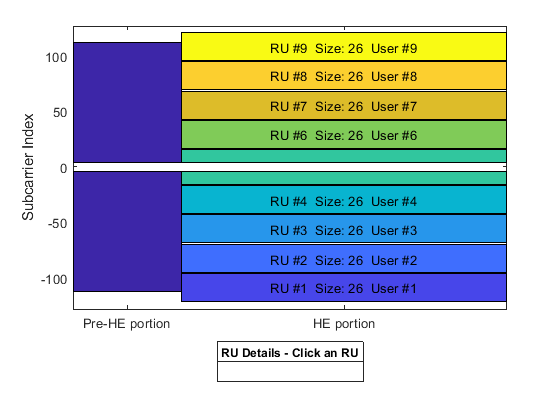

allocInfo = struct with fields:
                    NumUsers: 9
                      NumRUs: 9
                   RUIndices: [1 2 3 4 5 6 7 8 9]
                     RUSizes: [26 26 26 26 26 26 26 26 26]
               NumUsersPerRU: [1 1 1 1 1 1 1 1 1]
    NumSpaceTimeStreamsPerRU: [1 1 1 1 1 1 1 1 1]
       PowerBoostFactorPerRU: [1 1 1 1 1 1 1 1 1]
                   RUNumbers: [1 2 3 4 5 6 7 8 9]

mcs = 0

ans = 1×2 double
           0      109040

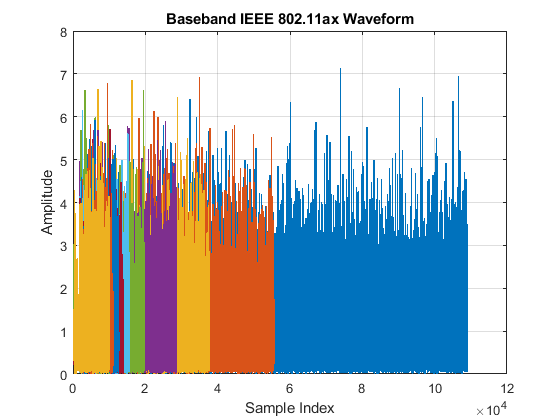

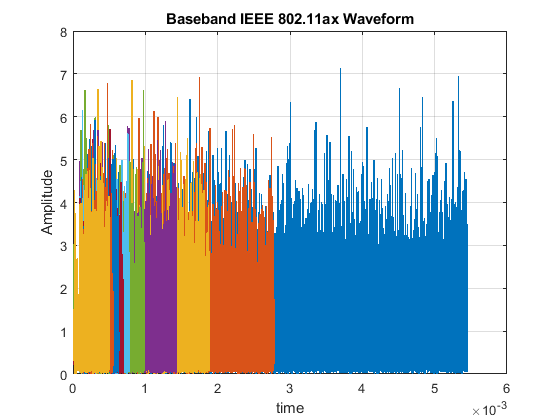

power1 = 1.0034

power2 = 1.0034

Tx_power = 1.0034

Avg_power_periodogram = 1.0034

mcs = 1

ans = 2×2 double
           0      109040
           1       55600

power1 = 0.9916

power2 = 0.9916

Tx_power = 0.9916

Avg_power_periodogram = 0.9916

mcs = 2

ans = 3×2 double
           0      109040
           1       55600
           2       37680

power1 = 0.9977

power2 = 0.9977

Tx_power = 0.9977

Avg_power_periodogram = 0.9977

mcs = 3

ans = 4×2 double
           0      109040
           1       55600
           2       37680
           3       28720

power1 = 0.9974

power2 = 0.9975

Tx_power = 0.9974

Avg_power_periodogram = 0.9974

mcs = 4

ans = 5×2 double
           0      109040
           1       55600
           2       37680
           3       28720
           4       19760

power1 = 1.0257

power2 = 1.0257

Tx_power = 1.0257

Avg_power_periodogram = 1.0257

mcs = 5

ans = 6×2 double
           0      109040
           1       55600
           2       37680
           3       28720
           4       19760
           5       15600

power1 = 1.0059

power2 = 1.0059

Tx_power = 1.0059

Avg_power_periodogram = 1.0059

mcs = 6

ans = 7×2 double
           0      109040
           1       55600
           2       37680
           3       28720
           4       19760
           5       15600
           6       14000

power1 = 0.9776

power2 = 0.9777

Tx_power = 0.9776

Avg_power_periodogram = 0.9776

mcs = 7

ans = 8×2 double
           0      109040
           1       55600
           2       37680
           3       28720
           4       19760
           5       15600
           6       14000
           7       12720

power1 = 1.0088

power2 = 1.0089

Tx_power = 1.0088

Avg_power_periodogram = 1.0088

mcs = 8

ans = 9×2 double
           0      109040
           1       55600
           2       37680
           3       28720
           4       19760
           5       15600
           6       14000
           7       12720
           8       11120

power1 = 1.0015

power2 = 1.0015

Tx_power = 1.0015

Avg_power_periodogram = 1.0015

mcs = 9

ans = 10×2 double
           0      109040
           1       55600
           2       37680
           3       28720
           4       19760
           5       15600
           6       14000
           7       12720
           8       11120
           9       10160

power1 = 1.0136

power2 = 1.0136

Tx_power = 1.0136

Avg_power_periodogram = 1.0136

ans = 10×4 double
         0    1.0034    0.1019    0.2038
    1.0000    0.9916    0.1007    0.2014
    2.0000    0.9977    0.1013    0.2027
    3.0000    0.9974    0.1013    0.2026
    4.0000    1.0257    0.1042    0.2083
    5.0000    1.0059    0.1022    0.2043
    6.0000    0.9776    0.0993    0.1986
    7.0000    1.0088    0.1025    0.2049
    8.0000    1.0015    0.1017    0.2034
    9.0000    1.0136    0.1029    0.2059

In [7]:
%packet power analysis for a HE-MU Tx. waveform for different MCS
%combination and RU size
clc; close all; clear all;
cfgHEMU= wlanHEMUConfig(0); 
% % % Allocation info:  NumUsers: 9       NumRUs: 9      RUIndices: [1 2 3 4 5 6 7 8 9]       
% % % RUSizes: [26 26 26 26 26 26 26 26 26]    NumUsersPerRU: [1 1 1 1 1 1 1 1 1]   RUNumbers: [1 2 3 4 5 6 7 8 9]
% % % Read-only properties:    ChannelBandwidth: 'CBW20'      AllocationIndex:0

cfgHEMU.showAllocation
 allocInfo = ruInfo(cfgHEMU)
sr= wlanSampleRate(cfgHEMU);

  cfgHEMU.User{1}.APEPLength =500;
for i = 2:numel(cfgHEMU.User) 
    cfgHEMU.User{i}.MCS = 10; 
    cfgHEMU.User{i}.APEPLength =1;
end 

power_vector=[];
MCS=[];      
tx_length=[];
avg_power_per_sc1=[];
Avg_power_26tone_RU1=[];
Avg_power_52tone_RU1=[];

numPackets =10;
for numPkt = 1:numPackets 
    cfgHEMU.User{1}.MCS= numPkt-1;
    mcs=cfgHEMU.User{1}.MCS % to see the effect of MCS on tx power
    MCS=[MCS mcs];
   
psduLength = getPSDULength(cfgHEMU);
% PSDU length in bytes, length changes every time depending on the selected MCS!!!
     txPSDU = cell(1,allocInfo.NumUsers);   % Generate a packet with random PSDU
for i = 1:allocInfo.NumUsers
     txPSDU{i} = randi([0 1],psduLength(i)*8,1,'int8'); % Generate random PSDU
     %txPSDU  length changes for every MCS being selected
end

% Create MU packetpacket waveform %%% txwave changes every time
txMUWave = wlanWaveformGenerator(txPSDU{:,1},cfgHEMU);
sample_length=length(txMUWave);
tx_length=[tx_length sample_length];
[MCS' tx_length' ]

figure(2)
plot(abs(txMUWave));grid on;hold on;
title('Baseband IEEE 802.11ax Waveform');
xlabel('Sample Index');
ylabel('Amplitude');

figure(3)
time = (1:length(txMUWave))/sr;
plot(time,abs(txMUWave));grid on;hold on;
title('Baseband IEEE 802.11ax Waveform');
xlabel('time');
ylabel('Amplitude');

% different way of computing Tx. power of a MU waveform
power1=(sum(abs(txMUWave).^2))/sample_length  % same as  var(txMUWave)
power2= var(txMUWave)
Tx_power=mean(txMUWave.*conj(txMUWave))
power_vector=[power_vector power1];
Avg_power_of_tx_waveform=power_vector'; % for display

% Avg. power per sub-carrier
avg_power_per_sc=power1/256;
avg_power_per_sc1=[avg_power_per_sc1 avg_power_per_sc];

% Avg. power per RU of 26 tones
Avg_power_26tone_RU=avg_power_per_sc*26;
Avg_power_26tone_RU1=[Avg_power_26tone_RU1 Avg_power_26tone_RU];

% Avg. power per RU of 52 tones
Avg_power_52tone_RU=avg_power_per_sc*52;
Avg_power_52tone_RU1=[Avg_power_52tone_RU1 Avg_power_52tone_RU];

%%%%%%%%%%%%%
[Pxx,F] = periodogram(txMUWave,'Centered');
% Power Spectral Density (PSD) estimate via periodogram method. 
% % Pxx is the PSD estimate, of a signal, txMUWave. F is the frequency range.
Avg_power_periodogram = bandpower(Pxx,F,'psd')
% % bandpower(Pxx, F, 'psd') computes the average power via a rectangle 
%approximation of the integral of the PSD estimate, given in the vector Pxx 
%over the frequencies specified in vector F.
end

avg_power_per_sc1=avg_power_per_sc1';
% for display
Avg_power_26tone_RU1=Avg_power_26tone_RU1';
Avg_power_52tone_RU1=Avg_power_52tone_RU1';

[MCS' Avg_power_of_tx_waveform Avg_power_26tone_RU1 Avg_power_52tone_RU1]

% signal analysis in frequency domain
spectrumAnalyzer = dsp.SpectrumAnalyzer;
spectrumAnalyzer.SampleRate = sr;
spectrumAnalyzer.SpectrumType = 'Power density';
spectrumAnalyzer.AveragingMethod = 'Exponential';
spectrumAnalyze.ForgettingFactor = 0.99;
spectrumAnalyzer.YLabel = 'PSD';
spectrumAnalyzer.YLimits = [-100 0];
spectrumAnalyzer.Title = 'Baseband IEEE 802.11ax Waveform';
spectrumAnalyzer((txMUWave));

